In [1]:
import prepare
import acquire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = prepare.prepare_stores()
df.index

The number of unique days is 1826
Number of days between first and last day is  1826 days 00:00:00


DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               ...
               '2017-12-31 00:00:00+00:00', '2017-12-31 00:00:00+00:00',
               '2017-12-31 00:00:00+00:00', '2017-12-31 00:00:00+00:00',
               '2017-12-31 00:00:00+00:00', '2017-12-31 00:00:00+00:00',
               '2017-12-31 00:00:00+00:00', '2017-12-31 00:00:00+00:00',
               '2017-12-31 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='sale_date', length=547800, freq=None)

In [3]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
print("Date Range is: ", df.index.min(), 'to', df.index.max())
print('Shape', df.shape[0])

Date Range is:  2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Shape 547800


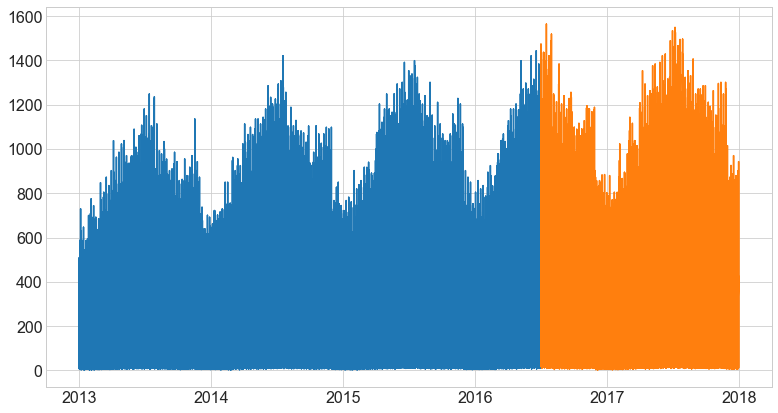

In [5]:
# Percentage Based split
train_size = 0.70
n = df.shape[0]
test_start_index = round(train_size * n)

# train is the data up to the 70% cut line
train = df[:test_start_index]
# test is the data after the 70% cut line
test = df[test_start_index:]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

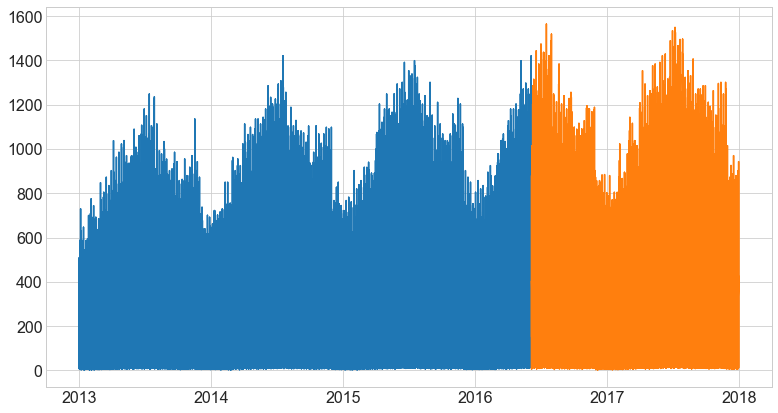

In [6]:
# Human Based split
# Our dataset is from JAN 2013 - DEC 2017

train = df[:'06-06-2016']
test = df['06-06-2016':]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [7]:
# Visualizations
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    177.98
2013-01-01 00:00:00+00:00    109.35
2013-01-01 00:00:00+00:00    437.25
2013-01-01 00:00:00+00:00    167.40
2013-01-01 00:00:00+00:00     18.62
Name: sales_total, dtype: float64

In [8]:
y.index = pd.to_datetime(y.index)

In [9]:
y.index

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               ...
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='sale_date', length=375900, freq=None)

<AxesSubplot:title={'center':'Distribution of Sales Totals'}, xlabel='Sales Totals, in Dollars', ylabel='Frequency'>

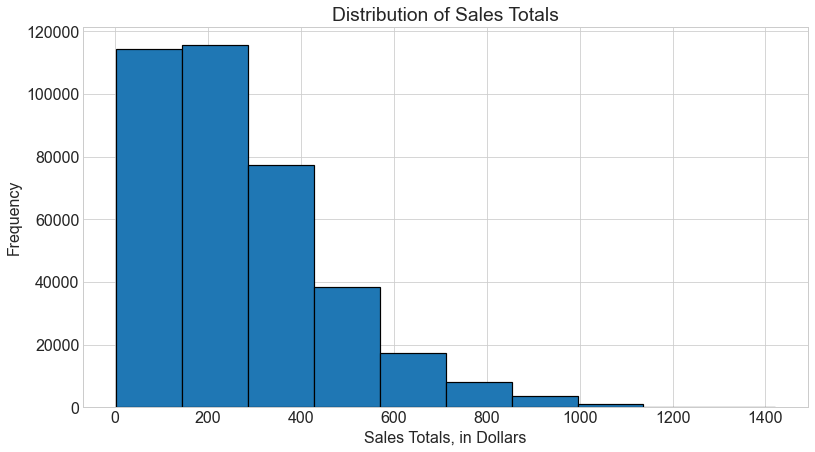

In [10]:
# Histogram
plt.title('Distribution of Sales Totals')
plt.xlabel('Sales Totals, in Dollars')
y.plot.hist(linewidth=1.2, edgecolor='black')

In [11]:
train.index

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               '2013-01-01 00:00:00+00:00', '2013-01-01 00:00:00+00:00',
               ...
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00',
               '2016-06-06 00:00:00+00:00', '2016-06-06 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='sale_date', length=375900, freq=None)

In [12]:
train['month'] = train.index.strftime('%m')
train['day'] = train.index.strftime('%d')

In [13]:
train.sample(10)

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store,store_address,store_city,store_state,store_zipcode,month,weekday,sales_total,day
sale_date,,,,,,,,,,,,,,,,,
2014-05-02 00:00:00+00:00,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With Broccoli,5.62,31000670016,31000670016,40.0,747321,10,8503 NW Military Hwy,San Antonio,TX,78231,05,Fri,224.80,02
2015-08-29 00:00:00+00:00,Zhenas Gypsy Tea,31,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Light Chai - 22 Ct,4.21,652790100226,652790100226,50.0,559727,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,08,Sat,210.50,29
2013-12-23 00:00:00+00:00,Bear Naked,47,Bear Naked Fit Almond Crisp 100 Percent Natural Energy Cereal,7.38,884623708976,884623708976,14.0,847621,5,1520 Austin Hwy,San Antonio,TX,78218,12,Mon,103.32,23
2015-04-15 00:00:00+00:00,P.f. Changs,41,P.f. Changs Home Menu Meal For Two Beef With Broccoli,5.62,31000670016,31000670016,16.0,734887,3,2118 Fredericksburg Rdj,San Antonio,TX,78201,04,Wed,89.92,15
2015-02-19 00:00:00+00:00,Easy-off,49,Easy-off Oven Cleaner Lemon Scent,9.54,62338879772,62338879772,31.0,882738,4,516 S Flores St,San Antonio,TX,78204,02,Thu,295.74,19
2013-08-01 00:00:00+00:00,Doctors Best,21,Doctors Best Best Curcumin C3 Complex 1000mg Tablets - 120 Ct,8.09,753950001954,753950001954,54.0,367239,2,9255 FM 471 West,San Antonio,TX,78251,08,Thu,436.86,01
2013-03-16 00:00:00+00:00,Usda Produce,28,Guava,7.52,719175900007,719175900007,77.0,493095,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,03,Sat,579.04,16
2015-09-24 00:00:00+00:00,Choice,50,Choice Organic Teas Black Tea Classic Black - 16 Ct,5.20,47445919221,47445919221,82.0,910345,9,735 SW Military Dr,San Antonio,TX,78221,09,Thu,426.40,24
2013-06-09 00:00:00+00:00,Sundown Naturals,38,Sundown Naturals Essential Electrolytes Tropical Punch Watermelon And Fruit Punch Gummies - 60 Ct,3.45,30768540548,30768540548,133.0,677606,2,9255 FM 471 West,San Antonio,TX,78251,06,Sun,458.85,09


sale_date
2013-01-01 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-01-02 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-01-03 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-01-04 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-01-05 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
                                           ...                
2016-06-02 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2016-06-03 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2016-06-04 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2016-06-05 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2016-06-06 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: D, Name: sales_total, Length: 1253, dtype: object

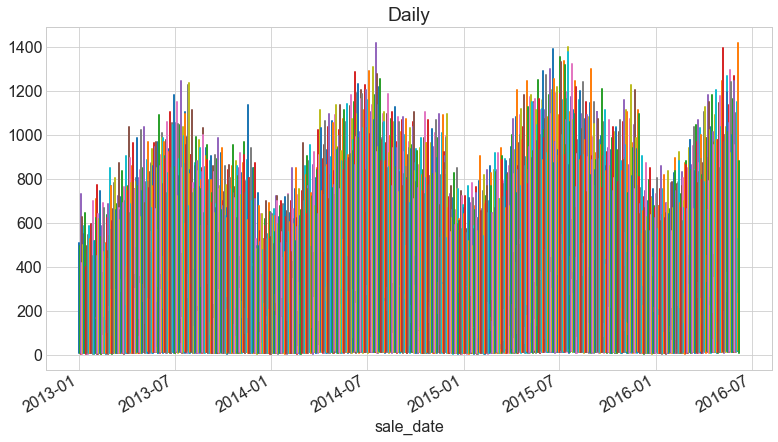

In [14]:
y.resample('1D').plot(title="Daily")

<AxesSubplot:title={'center':'monthly sales average'}, xlabel='sale_date'>

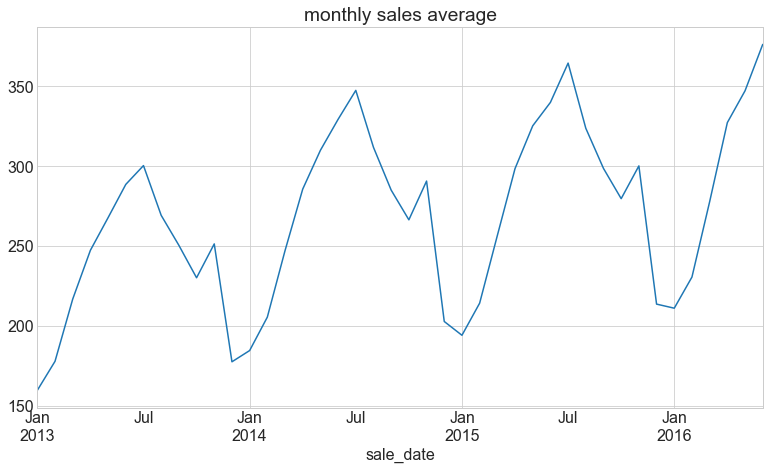

In [15]:
y.resample('1M').mean().plot(title='monthly sales average')

<AxesSubplot:title={'center':'6 month average'}, xlabel='sale_date'>

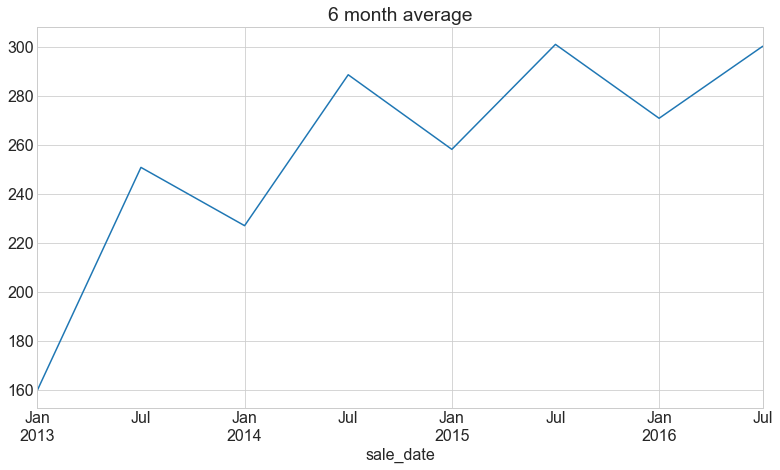

In [16]:
y.resample('6M').mean().plot(title="6 month average")

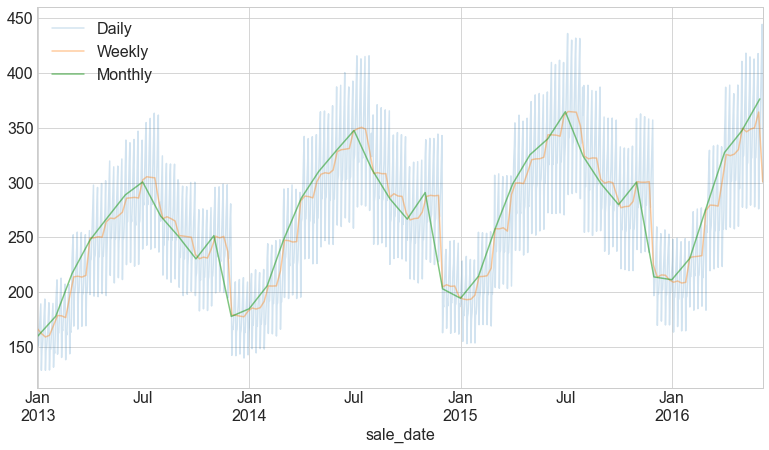

In [17]:
# multiple averages

y.resample('D').mean().plot(alpha=.2, label='Daily')
y.resample('W').mean().plot(alpha=.4, label='Weekly')
y.resample('M').mean().plot(alpha=.6, label='Monthly')
plt.legend()

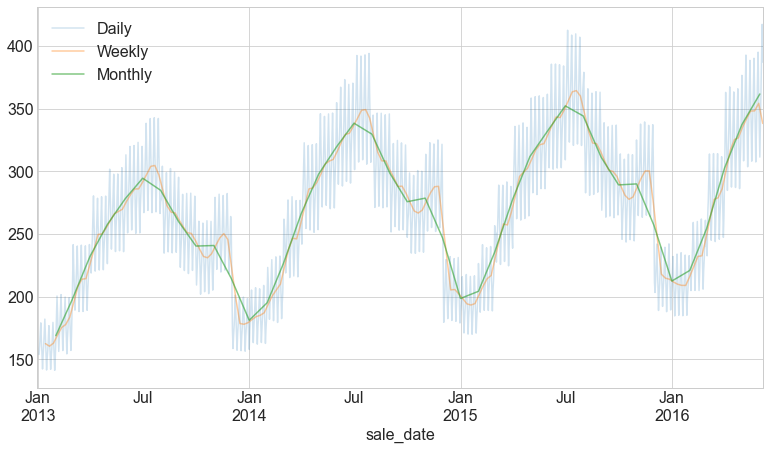

In [18]:
# rolling averages

y.resample('D').mean().rolling(3).mean().plot(alpha=.2, label='Daily')
y.resample('W').mean().rolling(3).mean().plot(alpha=.4, label='Weekly')
y.resample('M').mean().rolling(2).mean().plot(alpha=.6, label='Monthly')
plt.legend()

<AxesSubplot:title={'center':'Daily difference in in Total Sales'}, xlabel='sale_date'>

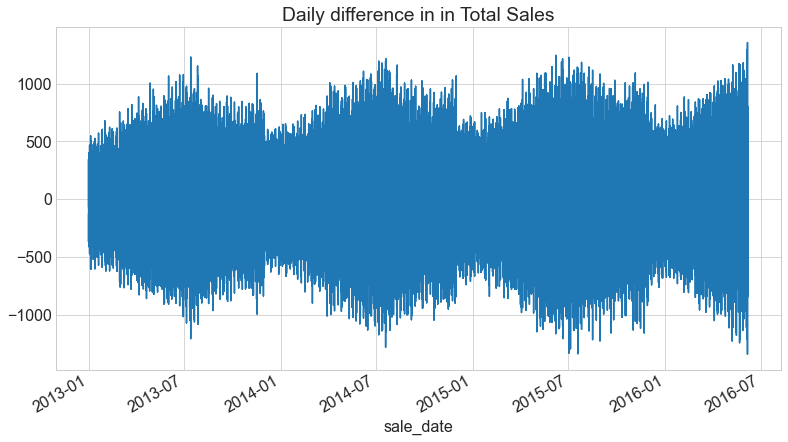

In [19]:
# Volatility, using .diff
# graphing the difference in daily sales (vs previous day)
y.diff().plot(title = 'Daily difference in in Total Sales')


<AxesSubplot:title={'center':'Daily % Change in Total Dollar Sales'}, xlabel='sale_date'>

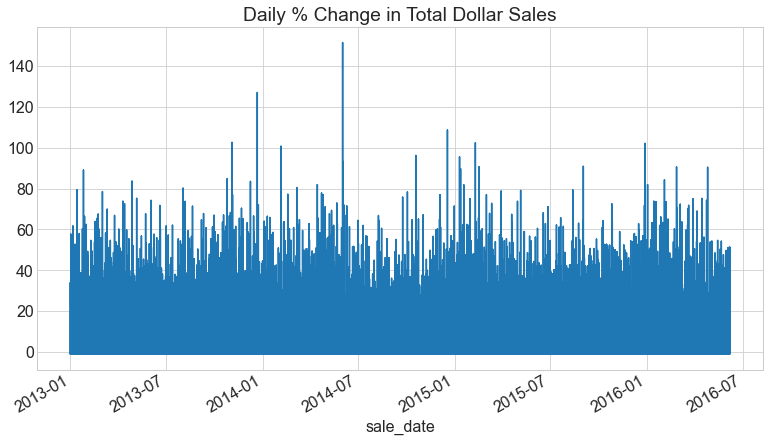

In [20]:
# graphing % change in sales using shift
(y.diff()/y.shift()).plot(title="Daily % Change in Total Dollar Sales")

<AxesSubplot:title={'center':'Average Weekly Change in Total Sales Volume'}, xlabel='sale_date'>

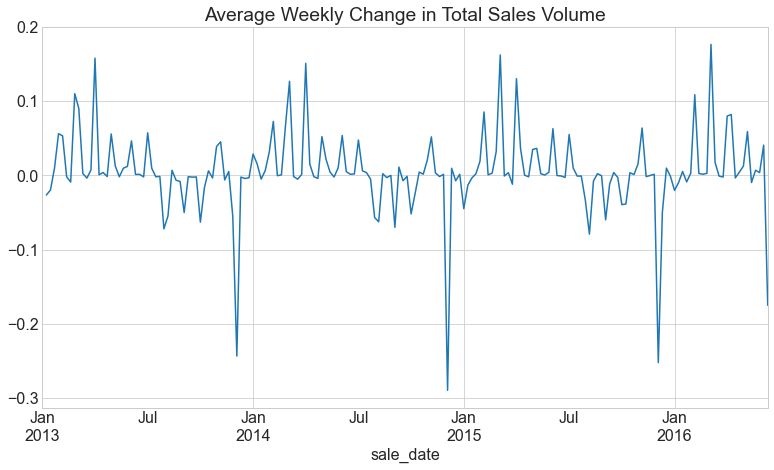

In [23]:
# get the weekly difference
(y.resample('W').mean().diff()/y.resample('W').mean().shift()).plot(title="Average Weekly Change in Total Sales Volume")

<AxesSubplot:title={'center':'Average Monthly Change in Total Sales Volume'}, xlabel='sale_date'>

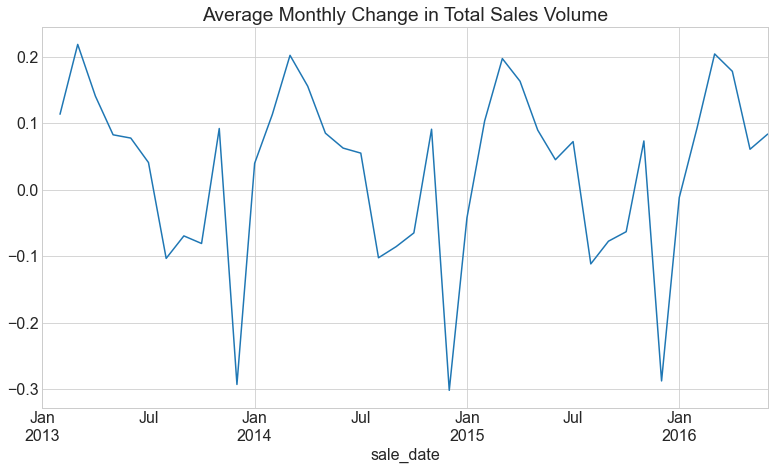

In [25]:
# get the monthly difference
(y.resample('M').mean().diff()/y.resample('M').mean().shift()).plot(title="Average Monthly Change in Total Sales Volume")

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

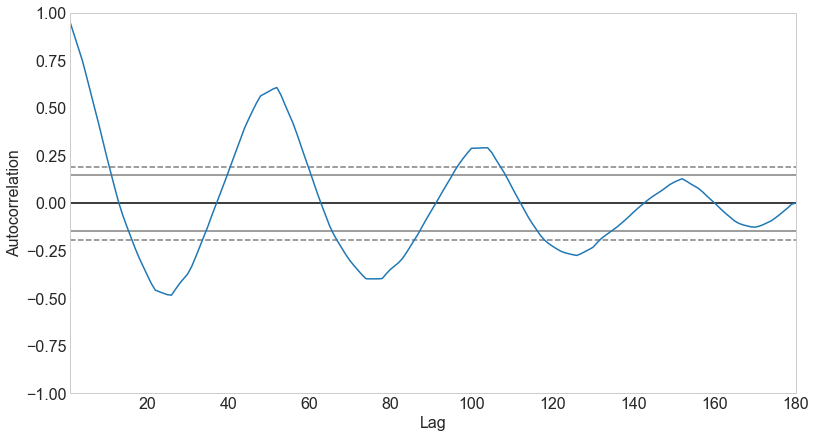

In [26]:
# autocorrelation plot on the weeklu resampling
pd.plotting.autocorrelation_plot(y.resample('W').mean())

In [27]:
# Seasonal decomposition
# seasonal decomposition consists of: the seasonal repeated cycle, the long term trend, 
# random noise

# data = seasonality + trend + residual

y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
result

In [28]:
result.seasonal

sale_date
2013-01-06 00:00:00+00:00   -76.823567
2013-01-13 00:00:00+00:00   -77.258166
2013-01-20 00:00:00+00:00   -78.632081
2013-01-27 00:00:00+00:00   -78.393193
2013-02-03 00:00:00+00:00   -74.219747
                               ...    
2016-05-15 00:00:00+00:00    39.211415
2016-05-22 00:00:00+00:00    38.482641
2016-05-29 00:00:00+00:00    40.224089
2016-06-05 00:00:00+00:00    58.291451
2016-06-12 00:00:00+00:00    58.727005
Freq: W-SUN, Name: seasonal, Length: 180, dtype: float64

In [30]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,166.643750,NaN,-76.823567,NaN
2013-01-13 00:00:00+00:00,162.251610,NaN,-77.258166,NaN
2013-01-20 00:00:00+00:00,159.042443,NaN,-78.632081,NaN
2013-01-27 00:00:00+00:00,160.561352,NaN,-78.393193,NaN
2013-02-03 00:00:00+00:00,169.604000,NaN,-74.219747,NaN


<AxesSubplot:xlabel='sale_date'>

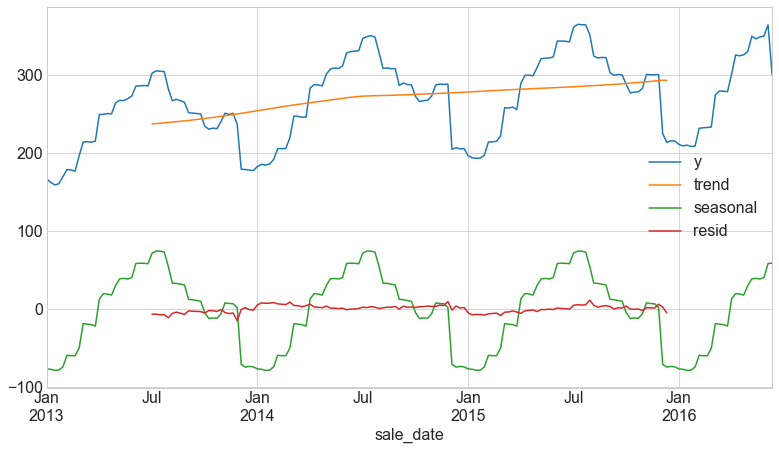

In [31]:
decomposition.plot()

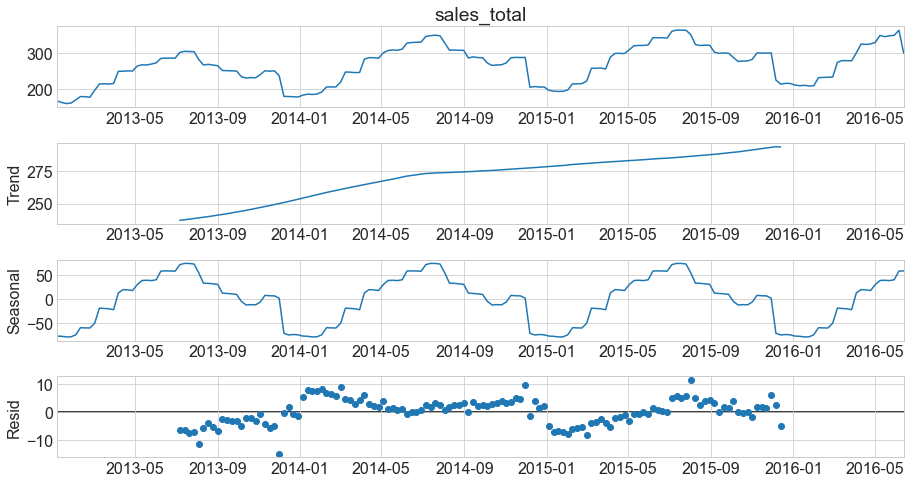

In [36]:
# the values from seasonal_decompose can then be plotted
result.plot()
None